In [2]:
import urllib.request 
import json
import time
import numpy
import matplotlib
import matplotlib.pyplot as plt
posts_data = {}

In [3]:
def get_data_from_url(url):
    req = urllib.request.Request(url) 
    response = urllib.request.urlopen(req) 
    result = response.read().decode('utf-8')
    return (result)

In [4]:
# результат из джейсон в словарь
def json_to_dict(result):
    data = json.loads(result) 
    return data

In [5]:
# обработка поста с получением из него информации необходимого типа
def post_content(num, content_type): #content_type = 'id' or 'text etc.; num = post num in items
    post_content = data['response']['items'][num][content_type]
    return post_content

In [6]:
#сбор словаря данных о постах в формате id:text

def collect_post_data(data):
    for num in range(len(data['response']['items'])):
        about_post = {}
        about_post ['text'] = post_content(num, 'text')
        about_post ['author'] = post_content(num, 'from_id')
        posts_data [post_content(num, 'id')] = about_post
        #print (num)
    return posts_data

In [7]:
# cкачать посты (=100)
offset=0
for h in range(5):
    print(offset)
    result = get_data_from_url('https://api.vk.com/method/wall.get?domain=spleanclub&count=100&v=5.74&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8&offset='+str(offset))
    print('https://api.vk.com/method/wall.get?spleanclub&count=100&v=5.74&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8&offset='+str(offset))
    offset += 100
    data = json_to_dict(result)
    with open ('posts.json', 'a', encoding = 'utf-8') as pj:
        pj.write(result)
    collect_post_data(data)
    time.sleep(1)

0
https://api.vk.com/method/wall.get?spleanclub&count=100&v=5.74&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8&offset=0
100
https://api.vk.com/method/wall.get?spleanclub&count=100&v=5.74&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8&offset=100
200
https://api.vk.com/method/wall.get?spleanclub&count=100&v=5.74&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8&offset=200
300
https://api.vk.com/method/wall.get?spleanclub&count=100&v=5.74&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8&offset=300
400
https://api.vk.com/method/wall.get?spleanclub&count=100&v=5.74&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8&offset=400


In [8]:
comments = {}
for num_id in posts_data.keys(): 
    result1 = get_data_from_url('https://api.vk.com/method/wall.getComments?owner_id=-708&count=&v=5.74&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8&post_id='+str(num_id))
    with open ('comments.json', 'a', encoding = 'utf-8') as pj:
        pj.write(result1)
    data = json_to_dict(result1)
    comments [num_id] = data['response']['items']


In [9]:
#посчитать слова в заданном тексте
def count_words(text):
    text_splt = text.split(' ')
    return len(text_splt)

In [10]:
#собирает массив с длиной поста и средней длиной его комменатриев (инфа по каждому посту)
lenghts = {}
for num_id in posts_data.keys():
    inner_dict = {}
    c_lenghts = []
    inner_dict ['p'] = count_words (posts_data[num_id]['text'])
    for i in range(len(comments[num_id])):
        c_lenghts.append(count_words (comments[num_id][i]['text']))
    if len(c_lenghts) == 0:
        inner_dict ['average_c'] = 0
    else:
        inner_dict ['average_c'] = (sum(c_lenghts)/len(c_lenghts))
    lenghts [num_id] = inner_dict

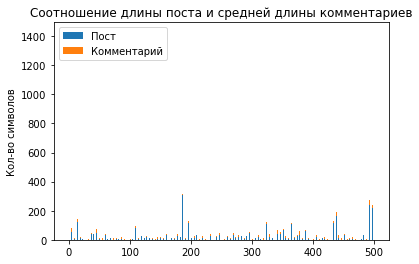

In [11]:
import numpy as np
import matplotlib.pyplot as plt

posts_Y = []
for post in lenghts:
    posts_Y.append(lenghts[post]['p'])

    
posts_Y2 = []
for post in lenghts:
    posts_Y2.append(lenghts[post]['average_c'])


N = 500


ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, posts_Y, width)
p2 = plt.bar(ind, posts_Y2, width,
             bottom=posts_Y)

plt.ylabel('Кол-во символов')
plt.title('Соотношение длины поста и средней длины комментариев')

plt.legend((p1[0], p2[0]), ('Пост', 'Комментарий'))

plt.show()

In [12]:
def user_info(users_ids):
    result = get_data_from_url('https://api.vk.com/method/users.get?user_ids='+users_ids+'&fields=bdate,city&v=5.8&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8')
    data = json_to_dict(result)
    return data

In [13]:
def collect_users_info(users_ids):
    user_inform ={}
    users_data = user_info(str(users_ids))
    #user_info(','.join(users_ids))
    users_data1=users_data['response']
    if users_data1:
        for i in range(len(users_data1)):
            date_city = {}
            try:
                date_city['bd']=users_data1[i]['bdate']
            except KeyError:
                pass
            try:
                date_city['city']=users_data1[i]['city']['title']
            except KeyError:
                pass
            user_inform[users_data1[i]['id']]=date_city
    return user_inform

In [14]:
users_meta_post={}
post_nums = posts_data.keys()
for num in post_nums:
    user_info_posts = collect_users_info(num)
    users_meta_post.update(user_info_posts)

In [16]:
def collect_users_comments(comments):
    comments_authors = []
    for num in comments.keys():
        for j in range(len(comments[num])):
            comments_authors.append(comments[num][j]['from_id'])
    return comments_authors
        

In [17]:
users_meta_comment = {}
users_comments = collect_users_comments(comments)
for num in users_comments[:500]:
    user_info_comments = collect_users_info(num)
    users_meta_comment.update(user_info_comments)

In [18]:
cities_lenghts = {}
users_city = []
len_posts_city = []
for user in users_meta_post:
    if 'city' in users_meta_post[user]:
        c_l_keys = list(cities_lenghts.keys()) 
        if c_l_keys.count(users_meta_post[user]['city']) == 0 :
            for user1 in users_meta_post:
                if 'city' in users_meta_post[user1]:
                    if users_meta_post[user]['city'] == users_meta_post[user1]['city']:
                        users_city.append(user1)
                        for user_c in users_city:
                            if len(posts_data[user_c]['text']) != 0:
                                len_posts_city.append(len(posts_data[user_c]['text']))
                            else:
                                len_posts_city.append(0)
        cities_lenghts [users_meta_post[user]['city']] = sum(len_posts_city)/len(len_posts_city)


In [21]:
bd_lenghts = {}
users_bd = []
len_posts_bd = []
for user in users_meta_post:
    if 'bd' in users_meta_post[user] and len(users_meta_post[user]['bd'])>=6:
        try:
            age = get_age(users_meta_post[user]['bd'])
        except ValueError:
            pass
        bd_l_keys = list(bd_lenghts.keys()) 
        if bd_l_keys.count(age) == 0 :
            for user1 in users_meta_post:
                if 'bd' in users_meta_post[user1] and len(users_meta_post[user1]['bd'])>=6:
                        try:
                            if get_age(users_meta_post[user]['bd']) == get_age(users_meta_post[user1]['bd']):
                                users_bd.append(user1)
                        except ValueError: 
                            pass
                            for user_bd in users_bd:
                                if len(posts_data[user_bd]['text']) != 0:
                                    len_posts_bd.append(len(posts_data[user_bd]['text']))
                                else:
                                    len_posts_bd.append(0)
        bd_lenghts [age] = sum(len_posts_bd)/len(len_posts_bd)

In [20]:
from datetime import date

def get_age(birthday):
    birth_date = birthday.split('.')
    bdate = date(int(birth_date[2]),int(birth_date[1]), int(birth_date[0]))
    today = date.today()
    years = today.year - bdate.year
    if all((x >= y) for x,y in zip(today.timetuple(), bdate.timetuple())):
        age = years
    else:
        age = years - 1
    return age



In [22]:
cities_lenghts_c = {}
users_city_c = []
len_posts_city_c = []
for user in users_meta_comment:
    if 'city' in users_meta_comment[user]:
        c_l_keys_c = list(cities_lenghts_c.keys()) 
        if c_l_keys_c.count(users_meta_comment[user]['city']) == 0 :
            for user1 in users_meta_comment:
                if 'city' in users_meta_comment[user1]:
                    if users_meta_comment[user]['city'] == users_meta_comment[user1]['city']:
                        users_city_c.append(user1)
                        for user_c in users_city_c:
                            for comm in comments:
                                if len(comments[comm])!=0:
                                    if 'text' in comments[comm][0] and comments[comm][0]['from_id']==user_c:
                                        if len(comments[comm][0]['text']) != 0:
                                            len_posts_city_c.append(len(comments[comm][0]['text']))
                                        else:
                                            len_posts_city_c.append(0)
        cities_lenghts_c [users_meta_comment[user]['city']] = sum(len_posts_city_c)/len(len_posts_city_c)


In [23]:
bd_lenghts_c = {}
users_bd_c = []
len_posts_bd_c = []
for user in users_meta_comment:
    if 'bd' in users_meta_comment[user] and len(users_meta_comment[user]['bd'])>=6:
        try:
            age = get_age(users_meta_comment[user]['bd'])
        except ValueError:
            pass
        bd_l_keys_c = list(bd_lenghts_c.keys()) 
        if bd_l_keys_c.count(age) == 0 :
            for user1 in users_meta_comment:
                if 'bd' in users_meta_comment[user1] and len(users_meta_comment[user1]['bd'])>=6:
                    try:
                        if get_age(users_meta_comment[user]['bd']) == get_age(users_meta_comment[user1]['bd']):
                                users_bd_c.append(user1)
                    except ValueError: 
                        pass
                        for user_bd in users_bd_c:
                            for comm in comments:
                                if len(comments[comm])!=0:
                                    if 'text' in comments[comm][0] and comments[comm][0]['from_id']==user_c:
                                        if len(comments[comm][0]['text']) != 0:
                                            len_posts_bd_c.append(len(comments[comm][0]['text']))
                                        else:
                                            len_posts_bd_c.append(0)
        bd_lenghts_c [age] = sum(len_posts_bd_c)/len(len_posts_bd_c)

ZeroDivisionError: division by zero

In [35]:
posts_cp = []
for city in cities_lenghts:
    posts_cp.append(cities_lenghts[city])

    
posts_cc = []
for city in cities_lenghts_c:
    posts_cc.append(cities_lenghts_c[city])

N = len(cities_lenghts_c)


ind = np.arange(N)    # th x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind,posts_cp, width)
p2 = plt.bar(ind, posts_cc, width,
             bottom=posts_cc)

plt.ylabel('Кол-во символов')
plt.title('Длины постов и комментариев по городу')

plt.legend((p1[0], p2[0]), ('Пост', 'Комментарий'))

plt.show()

ValueError: incompatible sizes: argument 'height' must be length 61 or scalar